# Clustering text documents using k-means

In [2]:
# Import Libraries
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import sys
from time import time

import pandas as pd
import numpy as np

In [4]:
# Selected 3 catergories from the 20 newsgroup dataset

categories = [
    'talk.religion.misc'
    ,'comp.graphics'
    ,'sci.space'
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['talk.religion.misc', 'comp.graphics', 'sci.space']


In [7]:
df = fetch_20newsgroups(subset='all', categories=categories,
                       shuffle=False, remove=('headers', 'footers', 'quotes'))

In [8]:
labels = df.target
true_k = len(np.unique(labels))
print(true_k)

3


In [9]:
## Perform Lemmatization

In [12]:
lemmatizer = WordNetLemmatizer()
for i in range(len(df.data)):
    word_list = word_tokenize(df.data[i])
    lemmatized_doc = ""
    for word in word_list:
        lemmatized_doc = lemmatized_doc + " " + lemmatizer.lemmatize(word)
    df.data[i] = lemmatized_doc

In [13]:
print(df.data[1])

 In regard to fractal commpression , I have seen 2 fractal compressed `` movie '' . They were both fairly impressive . The first one wa a 64 gray scale `` movie '' of Casablanca , it wa 1.3MB and had 11 minute of 13 fps video . It wa a little grainy but not bad at all . The second one I saw wa only 3 minute but it had 8 bit color with 10fps and measured in at 1.2MB . I consider the fractal movie a practical thing to explore . But unlike many other format out there , you do end up losing resolution . I do n't know what kind of software/hardware wa used for creating the `` movie '' I saw but the guy that showed them to me said it took 5-15 minute per frame to generate . But a I said above playback wa 10 or more frame per second . And how else could you put 11 minute on one floppy disk ?


In [16]:
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2)

X = vectorizer.fit_transform(df.data)

In [17]:
print(X.shape)

(2588, 14439)


## Clustering using standard k-means


In [18]:
km =KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
t0 =time()
km.fit(X)
print("done in %0.3fs" %(time() -t0))

done in 1.705s


## Standard measures of cluster quality

In [19]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.332
Completeness: 0.416
V-measure: 0.369
Adjusted Rand-Index: 0.254
Silhouette Coefficient: 0.010


## Identify the 10 most relevant terms in each cluster


In [22]:
centroids = km.cluster_centers_.argsort()[:,  ::-1]

terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("CLuster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

CLuster 0: wa space just like think ha time year know thing
CLuster 1: file image thanks format program know graphic bit gif ftp
CLuster 2: god jesus wa christian people bible did say word right


## Visualization

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [39]:
def frequencies_dict(cluster_index):
    if cluster_index > true_k - 1:
        return
    term_frequencies = km.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

In [40]:
def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

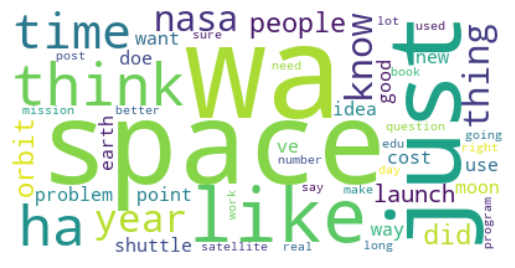

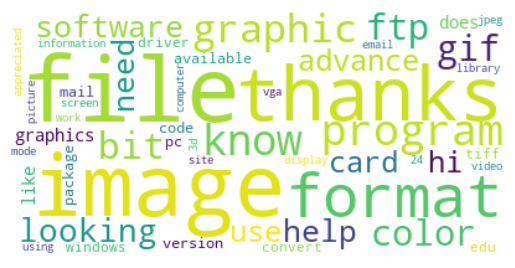

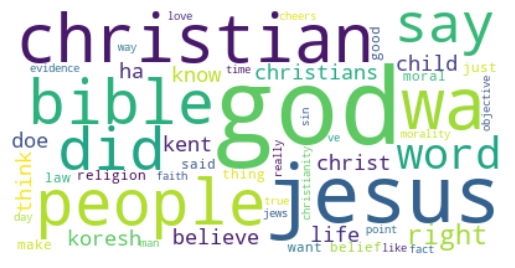

In [41]:
for i in range(true_k):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()